#Reading Samples

In [ ]:
path = r"/content/drive/MyDrive/SONAR/Database/wav files/wav files"

In [ ]:
import os
from scipy.io import wavfile


##Eliminating Zeros from the begining

In [ ]:
sr_all,wave_all,name_all=[],[],[]
for i,file in enumerate([f for f in os.listdir(path) if f.endswith(".wav")]):
  sr,wave=wavfile.read(os.path.join(path,file))
  for j,_ in enumerate(wave,2):
    if sum([abs(k) for k in wave[:j]]) != 0: wave=wave[j-1:]; break
  sr_all.append(sr)
  wave_all.append(wave)
  name_all.append(file)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
name_all

['outputvoice200.wav',
 'outputvoice198.wav',
 'outputvoice202.wav',
 'outputvoice190.wav',
 'outputvoice206.wav',
 'outputvoice186.wav',
 'outputvoice180.wav',
 'outputvoice178.wav',
 'outputvoice187.wav',
 'outputvoice204.wav',
 'outputvoice196.wav',
 'outputvoice189.wav',
 'outputvoice191.wav',
 'outputvoice181.wav',
 'outputvoice199.wav',
 'outputvoice185.wav',
 'outputvoice193.wav',
 'outputvoice203.wav',
 'outputvoice175.wav',
 'outputvoice183.wav',
 'outputvoice165.wav',
 'outputvoice176.wav',
 'outputvoice162.wav',
 'outputvoice205.wav',
 'outputvoice160.wav',
 'outputvoice194.wav',
 'outputvoice163.wav',
 'outputvoice208.wav',
 'outputvoice179.wav',
 'outputvoice192.wav',
 'outputvoice169.wav',
 'outputvoice171.wav',
 'outputvoice188.wav',
 'outputvoice184.wav',
 'outputvoice207.wav',
 'outputvoice170.wav',
 'outputvoice182.wav',
 'outputvoice172.wav',
 'outputvoice173.wav',
 'outputvoice201.wav',
 'outputvoice159.wav',
 'outputvoice166.wav',
 'outputvoice197.wav',
 'outputvoi

## Preprocessing Audio files

In [ ]:
!pip install openl3

  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.4/323.4 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for openl3: filename=openl3-0.4.2-py2.py3-none-any.whl size=249327032 sha256=26f0636150f1886790229d5ebb47007a03e04204b3b5dba46ca0363fca466748
  Stored in directory: /root/.cache/pip/wheels/d0/4d/0a/e57b1dc8ead91b3c5709d9de4f02d1cdd3a91f609a8f1c1062
  Created wheel for kapre: filename=kapre-0.3.7-py3-none-any.whl size=29602 sha256=8746c87a602aa2e301e20e28366a14b85b3cbd06ef993edc51587d0d980ba1ac
  Stored in directory: /root/.cache/pip/wheels/3e/54/f9/37e9f36590a5431dc207f7dc0eb2e607ff8958d5728e45ef58
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320708 sha256=ba39486ea0ac9235833090f60ac5a533354dc2422ba61a54845b5cec505e5478
  Stored in directory: /roo

In [ ]:
import openl3

In [ ]:
preprocessed_audio=[openl3.core._preprocess_audio_batch(wav,8000,center=True,hop_size=0.5) for wav in wave_all]

In [ ]:
len(preprocessed_audio)

208

In [ ]:
preprocessed_audio[0].shape

(10, 1, 48000)

In [ ]:
Audios=[]
names_all=[]
for i,k in enumerate(preprocessed_audio):
  for j in k:
    Audios.append(j)
    names_all.append(name_all[i])

In [ ]:
len(Audios),len(names_all)

(2080, 2080)

In [ ]:
Audios[0]

array([[   0,    0,    0, ...,  258,  712, 1064]], dtype=int16)

In [ ]:
import numpy as np

In [ ]:
Audios=np.array(Audios).astype("float32")

In [ ]:
Audios.shape

(2080, 1, 48000)

In [ ]:
Audios

array([[[     0.,      0.,      0., ...,    258.,    712.,   1064.]],

       [[   -37.,    -70.,    -86., ...,  17520.,  15571.,  13514.]],

       [[  1384.,   1633.,   1787., ...,   -355.,    411.,   1174.]],

       ...,

       [[ -1253.,  -1425.,  -1613., ...,  -1383.,  -1231.,  -1066.]],

       [[-18320., -16913., -15161., ...,  -5047.,  -5833.,  -6562.]],

       [[  -887.,   -712.,   -557., ...,      0.,      0.,      0.]]],
      dtype=float32)

In [ ]:
len(sr_all),len(Audios),len(names_all)

(208, 2080, 2080)

##Labels

In [ ]:
label_files=os.listdir(r"/content/drive/MyDrive/SONAR/Database/voice-icar-federico-ii-database/voice-icar-federico-ii-database-1.0.0")

In [ ]:
label_files=[i for i in label_files if i.endswith("info.txt")]

In [ ]:
names_all

['outputvoice200.wav',
 'outputvoice200.wav',
 'outputvoice200.wav',
 'outputvoice200.wav',
 'outputvoice200.wav',
 'outputvoice200.wav',
 'outputvoice200.wav',
 'outputvoice200.wav',
 'outputvoice200.wav',
 'outputvoice200.wav',
 'outputvoice198.wav',
 'outputvoice198.wav',
 'outputvoice198.wav',
 'outputvoice198.wav',
 'outputvoice198.wav',
 'outputvoice198.wav',
 'outputvoice198.wav',
 'outputvoice198.wav',
 'outputvoice198.wav',
 'outputvoice198.wav',
 'outputvoice202.wav',
 'outputvoice202.wav',
 'outputvoice202.wav',
 'outputvoice202.wav',
 'outputvoice202.wav',
 'outputvoice202.wav',
 'outputvoice202.wav',
 'outputvoice202.wav',
 'outputvoice202.wav',
 'outputvoice202.wav',
 'outputvoice190.wav',
 'outputvoice190.wav',
 'outputvoice190.wav',
 'outputvoice190.wav',
 'outputvoice190.wav',
 'outputvoice190.wav',
 'outputvoice190.wav',
 'outputvoice190.wav',
 'outputvoice190.wav',
 'outputvoice190.wav',
 'outputvoice206.wav',
 'outputvoice206.wav',
 'outputvoice206.wav',
 'outputvoi

In [ ]:
label_files

['voice161-info.txt',
 'voice183-info.txt',
 'voice107-info.txt',
 'voice130-info.txt',
 'voice030-info.txt',
 'voice119-info.txt',
 'voice198-info.txt',
 'voice007-info.txt',
 'voice167-info.txt',
 'voice015-info.txt',
 'voice021-info.txt',
 'voice048-info.txt',
 'voice162-info.txt',
 'voice073-info.txt',
 'voice053-info.txt',
 'voice027-info.txt',
 'voice201-info.txt',
 'voice159-info.txt',
 'voice005-info.txt',
 'voice082-info.txt',
 'voice142-info.txt',
 'voice093-info.txt',
 'voice133-info.txt',
 'voice184-info.txt',
 'voice150-info.txt',
 'voice096-info.txt',
 'voice069-info.txt',
 'voice064-info.txt',
 'voice118-info.txt',
 'voice194-info.txt',
 'voice072-info.txt',
 'voice176-info.txt',
 'voice115-info.txt',
 'voice044-info.txt',
 'voice169-info.txt',
 'voice095-info.txt',
 'voice061-info.txt',
 'voice087-info.txt',
 'voice018-info.txt',
 'voice204-info.txt',
 'voice110-info.txt',
 'voice031-info.txt',
 'voice127-info.txt',
 'voice203-info.txt',
 'voice147-info.txt',
 'voice075

In [ ]:
import re

In [ ]:
path=r"/content/drive/MyDrive/SONAR/Database/voice-icar-federico-ii-database/voice-icar-federico-ii-database-1.0.0"

In [ ]:
pattern=re.compile(r".*(Diagnosis:)(.*)")
pattern1=re.compile(r"output(voice\d+).wav")
labels=[]
for name in names_all:
    for file in label_files:
        if pattern1.sub(r"\1",name) in file:
            with open(os.path.join(path,file),"r") as f:
                for line in f.readlines():
                    if pattern.search(line):
                        labels.append(pattern.sub(r"\2",line).strip())
                        break


In [ ]:
labels

['hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia (Prolapse)',
 'hyperkinetic dysphonia (Prolapse)',
 'hyperkinetic dysphonia (Prolapse)',
 'hyperkinetic dysphonia (Prolapse)',
 'hyperkinetic dysphonia (Prolapse)',
 'hyperkinetic dysphonia (Prolapse)',
 'hyperkinetic dysphonia (Prolapse)',
 'hyperkinetic dysphonia (Prolapse)',
 'hyperkinetic dysphonia (Prolapse)',
 'hyperkinetic dysphonia (Prolapse)',
 'hypokinetic dysphonia',
 'hypokinetic dysphonia',
 'hypokinetic dysphonia',
 'hypokinetic dysphonia',
 'hypokinetic dysphonia',
 'hypokinetic dysphonia',
 'hypokinetic dysphonia',
 'hypokinetic dysphonia',
 'hypokinetic dysphonia',
 'hypokinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperki

In [ ]:
set(labels)

{'healthy',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia  (Rigid vocal fold)',
 'hyperkinetic dysphonia (Adduction deficit)',
 'hyperkinetic dysphonia (Cordite)',
 'hyperkinetic dysphonia (Nodule)',
 'hyperkinetic dysphonia (Polyps)',
 'hyperkinetic dysphonia (Prolapse)',
 "hyperkinetic dysphonia (Reinke's edema)",
 'hyperkinetic dysphonia (Vocal fold nodules)',
 'hyperkinetic dysphonia (Vocal fold paralysis)',
 'hyperkinetic dysphonia (Vocal fold prolapse)',
 'hyperkinetic dysphonia (nodule)',
 'hyperkinetic dysphonia (polyps)',
 'hypokinetic dysphonia',
 'hypokinetic dysphonia (Adduction deficit)',
 'hypokinetic dysphonia (Bilateral vocal fold)',
 'hypokinetic dysphonia (Conversion dysphonia)',
 'hypokinetic dysphonia (Dysphonia by chordal groove)',
 'hypokinetic dysphonia (Extraglottic air leak)',
 'hypokinetic dysphonia (Glottic insufficiency)',
 'hypokinetic dysphonia (Laryngitis)',
 'hypokinetic dysphonia (Presbiphonia)',
 'hypokinetic dysphonia (Spasmodic dysphonia)',
 'h

In [ ]:
new_labels=[]
for i in labels:
  i=str(i)
  if re.search(r"healthy",i) : new_labels.append("healthy")
  elif re.search(r"hyper",i) : new_labels.append("hyperkinetic dysphonia")
  elif re.search(r"hypo",i)  : new_labels.append("hypokinetic dysphonia")
  elif re.search(r"reflux",i)  : new_labels.append("reflux laryngitis")

In [ ]:
new_labels

['hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hypokinetic dysphonia',
 'hypokinetic dysphonia',
 'hypokinetic dysphonia',
 'hypokinetic dysphonia',
 'hypokinetic dysphonia',
 'hypokinetic dysphonia',
 'hypokinetic dysphonia',
 'hypokinetic dysphonia',
 'hypokinetic dysphonia',
 'hypokinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkinetic dysphonia',
 'hyperkine

In [ ]:
set(new_labels)

{'healthy',
 'hyperkinetic dysphonia',
 'hypokinetic dysphonia',
 'reflux laryngitis'}

In [ ]:
len(labels),len(new_labels)

(2080, 2080)

In [ ]:
import pandas as pd

In [ ]:
Audios_dt=pd.DataFrame(Audios.reshape(len(Audios),len(Audios[0,0,:])))
df=pd.concat([Audios_dt,pd.DataFrame(np.array(new_labels).reshape(-1,1))],axis=1)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,47991,47992,47993,47994,47995,47996,47997,47998,47999,0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2494.0,-2112.0,-1673.0,-1197.0,-692.0,-186.0,258.0,712.0,1064.0,hyperkinetic dysphonia
1,-37.0,-70.0,-86.0,-71.0,-38.0,0.0,25.0,70.0,93.0,88.0,...,8574.0,12868.0,16281.0,18425.0,19293.0,18897.0,17520.0,15571.0,13514.0,hyperkinetic dysphonia
2,1384.0,1633.0,1787.0,1855.0,1834.0,1766.0,1699.0,1612.0,1589.0,1640.0,...,-7016.0,-5747.0,-4507.0,-3340.0,-2256.0,-1263.0,-355.0,411.0,1174.0,hyperkinetic dysphonia
3,11767.0,10645.0,10268.0,10574.0,11354.0,12278.0,12974.0,13143.0,12589.0,11245.0,...,-5907.0,-6916.0,-7793.0,-8380.0,-8360.0,-7871.0,-6938.0,-5750.0,-4566.0,hyperkinetic dysphonia
4,1875.0,2423.0,2914.0,3260.0,3422.0,3364.0,3097.0,2635.0,2018.0,1320.0,...,-10404.0,-7958.0,-5568.0,-3265.0,-1048.0,1035.0,3118.0,5100.0,7054.0,hyperkinetic dysphonia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,308.0,50.0,-124.0,-334.0,-502.0,-664.0,-833.0,-951.0,-1076.0,-1186.0,...,-3153.0,-2574.0,-2077.0,-1670.0,-1371.0,-1170.0,-1075.0,-1064.0,-1136.0,reflux laryngitis
2076,-4118.0,-4217.0,-4367.0,-4562.0,-4786.0,-5005.0,-5231.0,-5423.0,-5601.0,-5733.0,...,-14713.0,-16272.0,-17641.0,-18753.0,-19591.0,-20090.0,-20236.0,-19991.0,-19348.0,reflux laryngitis
2077,-1253.0,-1425.0,-1613.0,-1801.0,-1975.0,-2134.0,-2258.0,-2343.0,-2407.0,-2442.0,...,-1886.0,-1834.0,-1777.0,-1709.0,-1620.0,-1517.0,-1383.0,-1231.0,-1066.0,reflux laryngitis
2078,-18320.0,-16913.0,-15161.0,-13078.0,-10747.0,-8198.0,-5508.0,-2749.0,-11.0,2600.0,...,-145.0,-923.0,-1747.0,-2530.0,-3384.0,-4223.0,-5047.0,-5833.0,-6562.0,reflux laryngitis


In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/SONAR/SVD_Hyp.csv")

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,47991,47992,47993,47994,47995,47996,47997,47998,47999,0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2494.0,-2112.0,-1673.0,-1197.0,-692.0,-186.0,258.0,712.0,1064.0,hyperkinetic dysphonia
1,-37.0,-70.0,-86.0,-71.0,-38.0,0.0,25.0,70.0,93.0,88.0,...,8574.0,12868.0,16281.0,18425.0,19293.0,18897.0,17520.0,15571.0,13514.0,hyperkinetic dysphonia
2,1384.0,1633.0,1787.0,1855.0,1834.0,1766.0,1699.0,1612.0,1589.0,1640.0,...,-7016.0,-5747.0,-4507.0,-3340.0,-2256.0,-1263.0,-355.0,411.0,1174.0,hyperkinetic dysphonia
3,11767.0,10645.0,10268.0,10574.0,11354.0,12278.0,12974.0,13143.0,12589.0,11245.0,...,-5907.0,-6916.0,-7793.0,-8380.0,-8360.0,-7871.0,-6938.0,-5750.0,-4566.0,hyperkinetic dysphonia
4,1875.0,2423.0,2914.0,3260.0,3422.0,3364.0,3097.0,2635.0,2018.0,1320.0,...,-10404.0,-7958.0,-5568.0,-3265.0,-1048.0,1035.0,3118.0,5100.0,7054.0,hyperkinetic dysphonia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,308.0,50.0,-124.0,-334.0,-502.0,-664.0,-833.0,-951.0,-1076.0,-1186.0,...,-3153.0,-2574.0,-2077.0,-1670.0,-1371.0,-1170.0,-1075.0,-1064.0,-1136.0,reflux laryngitis
2076,-4118.0,-4217.0,-4367.0,-4562.0,-4786.0,-5005.0,-5231.0,-5423.0,-5601.0,-5733.0,...,-14713.0,-16272.0,-17641.0,-18753.0,-19591.0,-20090.0,-20236.0,-19991.0,-19348.0,reflux laryngitis
2077,-1253.0,-1425.0,-1613.0,-1801.0,-1975.0,-2134.0,-2258.0,-2343.0,-2407.0,-2442.0,...,-1886.0,-1834.0,-1777.0,-1709.0,-1620.0,-1517.0,-1383.0,-1231.0,-1066.0,reflux laryngitis
2078,-18320.0,-16913.0,-15161.0,-13078.0,-10747.0,-8198.0,-5508.0,-2749.0,-11.0,2600.0,...,-145.0,-923.0,-1747.0,-2530.0,-3384.0,-4223.0,-5047.0,-5833.0,-6562.0,reflux laryngitis


In [ ]:
df1=df1.iloc[:,1:]
df1

,0,1,2,3,4,5,6,7,8,9,...,47991,47992,47993,47994,47995,47996,47997,47998,47999,48000
0,-285.0,-411.0,-433.0,-550.0,-629.0,-748.0,-795.0,-773.0,-712.0,-728.0,...,-8822.0,-8065.0,-6917.0,-5784.0,-4991.0,-4209.0,-3120.0,-1964.0,-857.0,hyperkinetic dysphonia
1,-2320.0,-2104.0,-2227.0,-2374.0,-2270.0,-2140.0,-2093.0,-1930.0,-1695.0,-1615.0,...,446.0,878.0,1425.0,1947.0,2388.0,2877.0,3354.0,3820.0,4234.0,hyperkinetic dysphonia
2,145.0,1041.0,2057.0,3086.0,3665.0,3834.0,4360.0,5342.0,5917.0,5786.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hyperkinetic dysphonia
3,917.0,1048.0,1049.0,1263.0,1453.0,1691.0,1871.0,2154.0,2392.0,2660.0,...,0.0,-75.0,-224.0,-405.0,-793.0,-1100.0,-1323.0,-1522.0,-1715.0,hyperkinetic dysphonia
4,6150.0,6416.0,6667.0,6963.0,7275.0,7562.0,7759.0,7836.0,7850.0,7805.0,...,-3903.0,-3932.0,-3927.0,-3818.0,-3689.0,-3502.0,-3309.0,-3143.0,-2922.0,hyperkinetic dysphonia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,-8697.0,-7329.0,-4823.0,-3870.0,-1951.0,-720.0,1212.0,2012.0,3635.0,4625.0,...,-8029.0,-9090.0,-10248.0,-10743.0,-10792.0,-11326.0,-12003.0,-12106.0,-11743.0,Healthy
2458,5903.0,3384.0,823.0,-904.0,-2569.0,-4463.0,-6525.0,-8207.0,-9564.0,-10444.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Healthy
2459,-547.0,-1255.0,-1968.0,-2727.0,-3412.0,-4083.0,-4702.0,-5273.0,-5819.0,-6342.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Healthy
2460,931.0,874.0,541.0,501.0,543.0,586.0,302.0,255.0,530.0,901.0,...,58.0,-651.0,-1505.0,-2398.0,-3235.0,-3926.0,-4399.0,-4772.0,-5257.0,Healthy


In [ ]:
df=pd.DataFrame(np.row_stack([df.values,df1.values]))

In [ ]:
df.iloc[:,-1]=df.iloc[:,-1].astype("str").apply(lambda x: x.lower())

In [ ]:
import pandas as pd
from sklearn.utils import resample


min_samples = df.iloc[:,-1].value_counts().min()


In [ ]:
min_samples

542

In [ ]:
df.iloc[:,-1].value_counts()

48000
healthy                   2001
hyperkinetic dysphonia    1119
hypokinetic dysphonia      880
reflux laryngitis          542
Name: count, dtype: int64

In [ ]:
df.iloc[:,-1].unique()

array(['hyperkinetic dysphonia', 'hypokinetic dysphonia', 'healthy',
       'reflux laryngitis'], dtype=object)

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,47991,47992,47993,47994,47995,47996,47997,47998,47999,48000
0,10263.0,12415.0,12565.0,13330.0,12597.0,12478.0,11412.0,10922.0,9757.0,9147.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,healthy
1,-3445.0,-3178.0,-2830.0,-2606.0,-2521.0,-2504.0,-2479.0,-2500.0,-2474.0,-2330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,healthy
2,-632.0,-488.0,-308.0,-128.0,0.0,0.0,0.0,19.0,77.0,140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,healthy
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7450.0,-7647.0,-7656.0,-7468.0,-7073.0,-6453.0,-5612.0,-4530.0,-3208.0,healthy
4,-1269.0,-913.0,-700.0,-695.0,-541.0,-227.0,0.0,7.0,0.0,0.0,...,5297.0,5387.0,5401.0,5296.0,5063.0,4813.0,4812.0,5018.0,5175.0,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4537,-4895.0,-4366.0,-3718.0,-2941.0,-2092.0,-1188.0,-286.0,456.0,1207.0,1819.0,...,-1640.0,-1689.0,-1766.0,-1903.0,-2129.0,-2416.0,-2787.0,-3204.0,-3646.0,reflux laryngitis
4538,5231.0,5091.0,5079.0,5027.0,4927.0,4648.0,4565.0,4735.0,4970.0,5055.0,...,8375.0,8683.0,8834.0,8804.0,8343.0,7829.0,7527.0,7526.0,7222.0,healthy
4539,-7327.0,-6643.0,-4847.0,-4160.0,-2628.0,-1824.0,-158.0,624.0,1902.0,2589.0,...,5771.0,5504.0,5143.0,4821.0,4722.0,4742.0,4955.0,5344.0,5779.0,healthy
4540,198.0,557.0,940.0,1109.0,1098.0,1194.0,1441.0,1749.0,2113.0,2515.0,...,-2223.0,-2517.0,-2998.0,-3430.0,-3604.0,-3586.0,-3598.0,-3910.0,-4461.0,hyperkinetic dysphonia


In [ ]:

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Determine the minimum number of samples in any class


# Downsample each class to the minimum number of samples
df_balanced = pd.DataFrame()

for label in df.iloc[:,-1].unique():
    df_class = df[df.iloc[:,-1] == label]
    df_class_downsampled = resample(df_class,
                                    replace=False,  # sample without replacement
                                    n_samples=min_samples,  # to match the minority class
                                    random_state=42)  # reproducible results
    df_balanced = pd.concat([df_balanced, df_class_downsampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

# Verify the class distribution in the balanced dataset
df_balanced.iloc[:,-1].value_counts()

0
hypokinetic dysphonia     380
reflux laryngitis         380
healthy                   380
hyperkinetic dysphonia    380
Name: count, dtype: int64

In [ ]:
df_balanced

,0,1,2,3,4,5,6,7,8,9,...,47991,47992,47993,47994,47995,47996,47997,47998,47999,0
0,-419.0,-579.0,-746.0,-910.0,-1048.0,-1154.0,-1211.0,-1212.0,-1178.0,-1100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hypokinetic dysphonia
1,-3193.0,-2255.0,-1289.0,-356.0,444.0,1196.0,1796.0,2341.0,2780.0,3119.0,...,3072.0,3370.0,3325.0,2955.0,2300.0,1457.0,535.0,-291.0,-1057.0,hypokinetic dysphonia
2,-2895.0,-2408.0,-2014.0,-1733.0,-1550.0,-1451.0,-1418.0,-1330.0,-1252.0,-1147.0,...,-3358.0,-4124.0,-4723.0,-5159.0,-5460.0,-5620.0,-5646.0,-5526.0,-5285.0,reflux laryngitis
3,-1452.0,-1861.0,-2371.0,-2928.0,-3490.0,-4009.0,-4440.0,-4763.0,-4951.0,-5009.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hypokinetic dysphonia
4,-21236.0,-20431.0,-19235.0,-17608.0,-15546.0,-13071.0,-10250.0,-7191.0,-4002.0,-822.0,...,-10753.0,-12234.0,-13597.0,-14706.0,-15437.0,-15738.0,-15565.0,-14979.0,-14061.0,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,-4580.0,-4259.0,-3949.0,-3643.0,-3352.0,-3076.0,-2815.0,-2577.0,-2357.0,-2166.0,...,-3079.0,-991.0,949.0,2718.0,4336.0,5713.0,6859.0,7799.0,8578.0,reflux laryngitis
1516,23143.0,25028.0,26370.0,27169.0,27413.0,27134.0,26388.0,25223.0,23712.0,21895.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,healthy
1517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2264.0,-2972.0,-3303.0,-3145.0,-2659.0,-1859.0,-877.0,97.0,1037.0,reflux laryngitis
1518,13105.0,12895.0,12485.0,11877.0,11150.0,10345.0,9553.0,8830.0,8250.0,7836.0,...,-11232.0,-11368.0,-11379.0,-11306.0,-11200.0,-11101.0,-11045.0,-11081.0,-11206.0,healthy


In [ ]:
df_balanced.to_csv("/content/drive/MyDrive/allolddata.csv")

In [ ]:
X=df_balanced.iloc[:,:-1].values.reshape(-1,1,len(df_balanced.columns)-1)
y=df_balanced.iloc[:,-1].values

In [ ]:
X=df.iloc[:,:-1].values.reshape(-1,1,len(df.columns)-1)
y=df.iloc[:,-1].values

In [ ]:
X.shape,y.shape

((4542, 1, 48000), (4542,))

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y=le.transform(y)

In [ ]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
y.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
X.shape,y.shape

((4542, 1, 48000), (4542,))

#Loading model

In [ ]:
basemodel=openl3.models.load_audio_embedding_model("mel128",embedding_size=512,content_type="music")

In [ ]:
len(basemodel.layers)

30

In [ ]:
mel_Input=[basemodel.layers[i] for i in range(3)]

In [ ]:
mel_Input[2].weights

[<tf.Variable 'batch_normalization/gamma:0' shape=(1,) dtype=float32, numpy=array([1.1132184], dtype=float32)>,
 <tf.Variable 'batch_normalization/beta:0' shape=(1,) dtype=float32, numpy=array([0.00407847], dtype=float32)>,
 <tf.Variable 'batch_normalization/moving_mean:0' shape=(1,) dtype=float32, numpy=array([-25.361977], dtype=float32)>,
 <tf.Variable 'batch_normalization/moving_variance:0' shape=(1,) dtype=float32, numpy=array([191.97818], dtype=float32)>]

In [ ]:
layer_1=[basemodel.layers[i] for i in range(3,10)]

In [ ]:
layer_2=[basemodel.layers[i] for i in range(10,17)]

In [ ]:
layer_3=[basemodel.layers[i] for i in range(17,24)]

In [ ]:
layer_4=[basemodel.layers[i] for i in range(24,30)]

In [ ]:
basemodel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 48000)]        0         
                                                                 
 melspectrogram (Sequential  (None, 128, 199, 1)       0         
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 128, 199, 1)       4         
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 128, 199, 64)      640       
                                                                 
 batch_normalization_1 (Bat  (None, 128, 199, 64)      256       
 chNormalization)                                                
                                                           

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
mel_input=tf.keras.Sequential(mel_Input)

In [ ]:
layer1=tf.keras.Sequential(layer_1)
layer2=tf.keras.Sequential(layer_2)
layer3=tf.keras.Sequential(layer_3)
layer4=tf.keras.Sequential(layer_4)

In [ ]:
x=mel_input.output
x=layer1(x)
x=layer2(x)
x=layer3(x)
x=layer4(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dense(128,activation="relu")(x)
x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.Dense(128,activation="relu")(x)
x=tf.keras.layers.Dense(4,activation="softmax")(x)
model_final=tf.keras.Model(inputs=mel_input.input,outputs=x)

In [ ]:
x=mel_input.output
x=layer1(x)
x=layer2(x)
x=layer3(x)
x=layer4(x)
Embedding=tf.keras.Model(inputs=mel_input.input,outputs=x)

In [ ]:
basemodel.trainable=True

In [ ]:
layer1.trainable=True

In [ ]:
layer2.trainable=True

In [ ]:
layer4.trainable=True

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
head_model1=model.output
head_model=tf.keras.layers.BatchNormalization()(head_model1)
head_model=tf.keras.layers.Dense(128,activation="relu")(head_model)
head_model=tf.keras.layers.Dense(4,activation="softmax")(head_model)
model_final=tf.keras.Model(inputs=model.input,outputs=[head_model,head_model1])

In [ ]:
for layer in model_final.layers[-11:-4]:
  layer.trainable=True

In [ ]:
for layer in model_final.layers[-4:]:
  layer.trainable=True

In [ ]:
model_final.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 48000)]        0         
                                                                 
 melspectrogram (Sequential  (None, 128, 199, 1)       0         
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 128, 199, 1)       4         
 Normalization)                                                  
                                                                 
 sequential_1 (Sequential)   (None, 64, 99, 64)        38080     
                                                                 
 sequential_2 (Sequential)   (None, 32, 49, 128)       222464    
                                                                 
 sequential_3 (Sequential)   (None, 16, 24, 256)       8872

In [ ]:
model_final.save("/content/drive/MyDrive/VOICED.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.optimizers.legacy import SGD

In [ ]:

model_final.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#sgd = SGD(lr=0.01, momentum=0.5, decay=0.001, nesterov=False)
#model_final.compile(tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#model_final.compile(optimizer=sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 )

In [ ]:
X_test.shape,y_test.shape

((1136, 1, 48000), (1136,))

In [ ]:
X_train.shape,y_train.shape

((3406, 1, 48000), (3406,))

In [ ]:
model_final.load_weights("file2.h5")

In [ ]:
y_test

array([0, 0, 1, ..., 2, 0, 2])

In [ ]:
history

In [ ]:
X_train=X_train.astype("float")
X_test=X_test.astype("float")

In [ ]:
history=model_final.fit(X_train,y_train,batch_size=128,epochs=50,validation_data=[X_test,y_test])

Epoch 1/50
27/27 [==============================] - 57s 1s/step - loss: 1.3340 - accuracy: 0.4656 - val_loss: 1.3800 - val_accuracy: 0.4542
Epoch 2/50
27/27 [==============================] - 5s 192ms/step - loss: 1.0599 - accuracy: 0.5570 - val_loss: 1.3498 - val_accuracy: 0.4463
Epoch 3/50
27/27 [==============================] - 5s 193ms/step - loss: 0.9886 - accuracy: 0.5957 - val_loss: 1.3555 - val_accuracy: 0.4085
Epoch 4/50
27/27 [==============================] - 5s 192ms/step - loss: 0.9373 - accuracy: 0.6157 - val_loss: 1.2075 - val_accuracy: 0.4762
Epoch 5/50
27/27 [==============================] - 5s 192ms/step - loss: 0.8989 - accuracy: 0.6427 - val_loss: 1.0874 - val_accuracy: 0.5370
Epoch 6/50
27/27 [==============================] - 5s 191ms/step - loss: 0.8546 - accuracy: 0.6536 - val_loss: 1.0732 - val_accuracy: 0.5519
Epoch 7/50
27/27 [==============================] - 5s 191ms/step - loss: 0.7914 - accuracy: 0.6850 - val_loss: 1.0314 - val_accuracy: 0.5581
Epoch 8/

In [ ]:
history1=model_final.fit(X_train,y_train,batch_size=128,epochs=100,initial_epoch=len(history.epoch),validation_data=[X_test,y_test])

Epoch 51/100
27/27 [==============================] - 71s 1s/step - loss: 2.1115 - accuracy: 0.4577 - val_loss: 188.8228 - val_accuracy: 0.4252
Epoch 52/100
27/27 [==============================] - 15s 554ms/step - loss: 1.2327 - accuracy: 0.4935 - val_loss: 8.9463 - val_accuracy: 0.4093
Epoch 53/100
27/27 [==============================] - 15s 555ms/step - loss: 1.1354 - accuracy: 0.5062 - val_loss: 4.7276 - val_accuracy: 0.3627
Epoch 54/100
27/27 [==============================] - 15s 558ms/step - loss: 1.1049 - accuracy: 0.5214 - val_loss: 2.5281 - val_accuracy: 0.3856
Epoch 55/100
27/27 [==============================] - 15s 558ms/step - loss: 1.0741 - accuracy: 0.5443 - val_loss: 2.0871 - val_accuracy: 0.3239
Epoch 56/100
27/27 [==============================] - 15s 557ms/step - loss: 1.0421 - accuracy: 0.5546 - val_loss: 1.6276 - val_accuracy: 0.3433
Epoch 57/100
27/27 [==============================] - 15s 556ms/step - loss: 1.0201 - accuracy: 0.5666 - val_loss: 1.2900 - val_acc

In [ ]:
history2=model_final.fit(X_train,y_train,batch_size=128,epochs=125,initial_epoch=len(history1.epoch),validation_data=[X_test,y_test])

Epoch 51/125
27/27 [==============================] - 15s 574ms/step - loss: 0.1629 - accuracy: 0.9381 - val_loss: 0.7939 - val_accuracy: 0.7984
Epoch 52/125
27/27 [==============================] - 15s 560ms/step - loss: 0.1830 - accuracy: 0.9284 - val_loss: 0.9915 - val_accuracy: 0.7562
Epoch 53/125
27/27 [==============================] - 15s 561ms/step - loss: 0.1511 - accuracy: 0.9451 - val_loss: 0.7682 - val_accuracy: 0.8107
Epoch 54/125
27/27 [==============================] - 15s 559ms/step - loss: 0.1527 - accuracy: 0.9442 - val_loss: 0.8803 - val_accuracy: 0.7764
Epoch 55/125
27/27 [==============================] - 15s 556ms/step - loss: 0.2234 - accuracy: 0.9166 - val_loss: 0.7110 - val_accuracy: 0.7746
Epoch 56/125
27/27 [==============================] - 15s 556ms/step - loss: 0.2097 - accuracy: 0.9254 - val_loss: 1.6538 - val_accuracy: 0.5669
Epoch 57/125
27/27 [==============================] - 15s 556ms/step - loss: 0.1503 - accuracy: 0.9433 - val_loss: 0.6934 - val_ac

In [ ]:
history3=model_final.fit(X_train,y_train,batch_size=128,epochs=150,initial_epoch=125,validation_data=[X_test,y_test])

Epoch 126/150
27/27 [==============================] - 15s 569ms/step - loss: 0.0989 - accuracy: 0.9615 - val_loss: 0.9479 - val_accuracy: 0.8442
Epoch 127/150
27/27 [==============================] - 15s 559ms/step - loss: 0.1026 - accuracy: 0.9618 - val_loss: 1.8666 - val_accuracy: 0.7544
Epoch 128/150
27/27 [==============================] - 15s 561ms/step - loss: 0.1169 - accuracy: 0.9563 - val_loss: 1.0179 - val_accuracy: 0.8107
Epoch 129/150
27/27 [==============================] - 15s 558ms/step - loss: 0.1582 - accuracy: 0.9457 - val_loss: 1.6289 - val_accuracy: 0.7306
Epoch 130/150
27/27 [==============================] - 15s 555ms/step - loss: 0.2046 - accuracy: 0.9304 - val_loss: 1.1558 - val_accuracy: 0.7280
Epoch 131/150
27/27 [==============================] - 15s 555ms/step - loss: 0.1735 - accuracy: 0.9445 - val_loss: 2.8624 - val_accuracy: 0.5202
Epoch 132/150
27/27 [==============================] - 15s 555ms/step - loss: 0.1769 - accuracy: 0.9413 - val_loss: 2.1140 -

In [ ]:
SVD=pd.read_csv("/content/drive/MyDrive/SONAR/output_SVD_balanced.csv")

In [ ]:
SVD


,Unnamed: 0,labels,0,1,2,3,4,5,6,7,...,47990,47991,47992,47993,47994,47995,47996,47997,47998,47999
0,0,Inflammatory Condition,-287,233,887,1427,1956,2312,2611,2694,...,-3581,-3424,-3323,-3269,-3162,-3060,-2939,-2804,-2716,-2651
1,1,Structural Voice Disorder,-1995,-2020,-1940,-1828,-1808,-1749,-1620,-1403,...,0,0,0,0,0,0,0,0,0,0
2,2,Neurogenic Voice Disorder,-581,-1228,-1961,-2676,-3449,-4377,-5401,-6278,...,1896,1279,572,-161,-805,-1270,-1757,-2203,-2689,-3095
3,3,Neurogenic Voice Disorder,3486,3567,3731,3309,2622,2179,1921,1814,...,0,0,0,0,0,0,0,0,0,0
4,4,Inflammatory Condition,-2957,-2374,-1989,-1751,-1555,-1414,-1083,-610,...,3003,2972,2819,2559,2418,2434,2316,1986,1654,1464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,1693,Healthy,-21,-17,-10,0,0,0,30,91,...,0,0,0,0,0,0,0,0,0,0
1694,1694,Inflammatory Condition,1589,3118,4428,5755,6727,7544,8113,8662,...,-8888,-9117,-9160,-9058,-9110,-9142,-9004,-8543,-7859,-7117
1695,1695,Healthy,5022,5133,5163,4907,4594,4398,4178,3798,...,0,0,0,0,0,0,0,0,0,0
1696,1696,Muscle Tension Voice Disorder,2523,3007,2902,2826,2356,2082,1489,1088,...,7867,8334,8822,9296,9700,9998,10164,10251,10163,9923


In [ ]:
y=SVD["labels"].values

In [ ]:
y

array(['Inflammatory Condition', 'Structural Voice Disorder',
       'Neurogenic Voice Disorder', ..., 'Healthy',
       'Muscle Tension Voice Disorder', 'Functional Voice Disorder'],
      dtype=object)

In [ ]:
X=SVD.iloc[:,2:].values

In [ ]:
X=X.reshape(-1,1,48000)

In [ ]:
Embedding.predict(X)

54/54 [==============================] - 3s 52ms/step


array([[0.68473566, 1.0943576 , 4.266503  , ..., 2.9273427 , 1.0730355 ,
        3.937057  ],
       [0.8710675 , 0.8562651 , 3.3326514 , ..., 4.0293903 , 1.2418497 ,
        3.5119627 ],
       [0.26368007, 1.537586  , 3.0767937 , ..., 3.1870236 , 1.4468812 ,
        3.8902373 ],
       ...,
       [1.5263118 , 0.42090937, 2.5572762 , ..., 2.6022916 , 0.8974517 ,
        3.6129706 ],
       [0.49007127, 1.9352723 , 3.109821  , ..., 2.7821395 , 0.57287824,
        3.537733  ],
       [1.1414555 , 1.5425009 , 2.276105  , ..., 2.0214138 , 0.9286259 ,
        3.8292797 ]], dtype=float32)

In [ ]:
Embedding.predict(X_test)

12/12 [==============================] - 10s 422ms/step


array([[1.4952227 , 2.455396  , 3.1517224 , ..., 3.2695122 , 2.4820805 ,
        3.9939244 ],
       [2.0813508 , 1.5339695 , 2.9774337 , ..., 2.85898   , 2.4090097 ,
        3.8227336 ],
       [1.4235184 , 2.1558385 , 2.499834  , ..., 2.2740896 , 0.75739545,
        3.629107  ],
       ...,
       [1.7723197 , 1.4663069 , 2.75593   , ..., 2.1126394 , 0.5954742 ,
        3.9659278 ],
       [2.3864017 , 1.5564792 , 2.2266893 , ..., 2.6328762 , 1.3525947 ,
        3.7214634 ],
       [2.1333768 , 1.4870288 , 2.12893   , ..., 2.7101305 , 1.2758049 ,
        4.027386  ]], dtype=float32)

In [ ]:
Embedding.predict(X_train)

36/36 [==============================] - 4s 124ms/step


array([[ 7.476895  ,  4.622501  ,  1.9212278 , ...,  1.8821669 ,
         3.0216885 ,  6.12986   ],
       [ 8.089707  ,  4.845512  ,  2.5325503 , ...,  0.8648057 ,
         3.207462  ,  7.011788  ],
       [ 5.3828588 ,  2.9354887 , -0.14576727, ..., -0.48342475,
         0.5481949 ,  3.0564358 ],
       ...,
       [ 7.3821583 ,  4.0272026 ,  2.1500237 , ..., -0.16994798,
         2.2118633 ,  5.9545417 ],
       [ 7.486079  ,  2.9801183 ,  1.0801778 , ..., -0.44499505,
         2.234064  ,  5.317598  ],
       [ 6.7076836 ,  2.901631  ,  2.1798177 , ...,  0.6867871 ,
         2.0779061 ,  6.3485575 ]], dtype=float32)

In [ ]:
q= ["label"]
q.extend([f"feature{i}" for i in range(1,513)])
d1=pd.DataFrame(np.column_stack([np.array(y_train).reshape(-1,1),Embedding.predict(X_train)]),columns=q)

36/36 [==============================] - 4s 126ms/step


In [ ]:
d1

,label,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512
0,3.0,7.476895,4.622501,1.921228,9.598754,4.801108,2.345647,4.388931,3.363960,6.918935,...,5.787528,1.950140,4.222361,5.232300,3.000012,4.528360,3.905837,1.882167,3.021688,6.129860
1,1.0,8.089707,4.845512,2.532550,7.550158,2.929578,3.526227,4.097830,3.365785,7.412697,...,5.836758,1.464295,4.252270,4.149330,3.711034,5.419499,4.579636,0.864806,3.207462,7.011788
2,0.0,5.382859,2.935489,-0.145767,2.375652,1.005594,0.975381,1.507113,-0.233041,2.339552,...,3.253361,0.136512,0.451906,-0.169125,2.304518,3.075536,2.125075,-0.483425,0.548195,3.056436
3,3.0,7.849773,2.913132,1.105470,7.031047,3.469641,2.663712,3.151291,3.351613,7.032872,...,5.528034,1.678208,3.578479,3.270491,1.625245,4.884044,4.054446,0.315191,1.874095,6.272377
4,2.0,7.196381,3.046348,0.853972,4.291470,0.635718,2.900146,2.378996,2.131646,5.172808,...,4.430745,1.496836,3.749988,2.659286,4.418312,4.525519,4.628764,-0.387770,2.498706,4.004214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1.0,7.287979,3.043084,1.527322,5.146320,1.131418,4.283566,2.596521,1.403599,5.543907,...,4.972280,1.606907,4.360535,2.295152,3.596624,4.881245,4.084270,0.296791,1.939815,5.382625
1136,0.0,7.258670,2.644718,2.580335,8.430481,3.803836,1.302262,5.252377,4.310099,5.508592,...,6.007926,1.862768,3.946377,2.660533,3.170266,4.145016,3.771477,1.257786,2.097907,5.282912
1137,2.0,7.382158,4.027203,2.150024,7.494004,3.734136,1.785220,2.682330,4.890536,7.635607,...,6.535492,1.665429,5.386561,2.986870,3.050645,4.390266,4.847327,-0.169948,2.211863,5.954542
1138,2.0,7.486079,2.980118,1.080178,5.905770,1.725800,1.500261,2.878332,3.368820,8.531569,...,14.147402,1.668941,3.712671,0.942794,2.890145,4.428151,4.263247,-0.444995,2.234064,5.317598


In [ ]:
q= ["label"]
q.extend([f"feature{i}" for i in range(1,513)])
d2=pd.DataFrame(np.column_stack([np.array(y_test).reshape(-1,1),Embedding.predict(X_test)]),columns=q)

12/12 [==============================] - 0s 33ms/step


In [ ]:
d2

,label,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512
0,3.0,5.264555,4.485331,2.393207,7.215892,4.428266,0.704940,4.635391,3.519309,6.360216,...,5.202621,0.997420,2.508317,3.181504,2.865331,3.612840,2.548537,0.671441,2.296954,5.635046
1,3.0,7.631959,3.250064,1.349868,4.740701,1.149728,2.513055,2.986588,3.498475,5.507769,...,5.654925,1.880222,4.485160,3.253738,3.894765,4.874991,4.886438,0.266469,2.680522,5.283819
2,1.0,6.298730,2.777138,0.418107,5.772070,1.076937,2.362018,2.163969,1.370799,6.179648,...,6.401169,1.591454,4.204709,1.368902,3.845208,4.406706,3.895840,-0.210105,2.235188,6.208980
3,3.0,7.596319,2.936118,1.839779,6.549356,2.049778,1.055367,2.928439,3.738636,6.224284,...,5.293952,1.622841,3.885741,2.758044,3.178589,5.190753,4.119428,0.373184,1.821235,5.727553
4,2.0,7.201675,5.002568,3.182132,8.949046,4.119658,1.865299,6.037909,4.981590,6.584078,...,5.643158,2.284593,3.809972,2.784989,3.263476,4.249690,4.119594,1.337030,1.975985,5.103961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,3.0,7.265810,3.550595,2.177947,5.623613,1.864080,2.628975,3.091984,3.407632,6.601597,...,5.103023,1.921847,3.962684,3.897151,3.922274,5.002406,4.080692,0.222349,2.828181,5.122053
376,3.0,7.169976,3.071154,3.476498,7.503333,3.627083,1.007691,6.502195,5.725533,5.420336,...,6.430808,1.675859,5.065603,4.795617,3.465388,5.238523,4.148104,0.861024,1.730061,7.882156
377,3.0,6.198427,2.364370,1.728705,5.814816,2.514041,2.647964,2.891657,3.462253,6.699419,...,5.127751,1.924960,4.280840,3.469400,3.776941,3.842108,4.517907,0.550514,2.309574,5.113578
378,1.0,6.956531,2.662141,1.091475,5.260693,1.443215,3.199255,2.581798,3.110219,6.094227,...,6.594264,2.004684,4.267176,3.032624,2.490315,3.927726,4.075150,0.040668,2.714656,6.199566


In [ ]:
q= ["label"]
q.extend([f"feature{i}" for i in range(1,513)])
d3=pd.DataFrame(np.column_stack([np.array(y).reshape(-1,1),Embedding.predict(X)]),columns=q)

54/54 [==============================] - 2s 35ms/step


In [ ]:
d3

,label,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512
0,Inflammatory Condition,0.684736,1.094358,4.266503,1.52806,1.057395,3.382315,1.648307,1.289089,1.40549,...,1.402457,0.085808,1.925818,1.749676,2.984017,4.292385,2.122216,2.927343,1.073035,3.937057
1,Structural Voice Disorder,0.871068,0.856265,3.332651,1.883991,3.054763,2.024927,2.205319,1.780958,1.504201,...,2.149368,0.574115,2.465599,2.296203,2.425002,4.109804,3.667325,4.02939,1.24185,3.511963
2,Neurogenic Voice Disorder,0.26368,1.537586,3.076794,1.884197,1.480983,2.611841,0.96531,1.228733,2.414051,...,0.969947,-0.47703,1.381939,2.279585,2.227781,3.498236,3.691297,3.187024,1.446881,3.890237
3,Neurogenic Voice Disorder,0.754115,1.397247,2.167469,1.793807,2.131488,1.989462,1.539565,1.685215,1.861938,...,1.621875,0.563281,1.559592,2.22716,2.611279,4.376622,2.822068,2.37631,1.053318,3.731236
4,Inflammatory Condition,0.96574,1.124368,1.564215,1.364656,0.977921,1.896675,1.315061,1.331996,1.908712,...,1.988981,-0.679599,1.673493,2.042848,2.938716,5.130287,3.482903,2.752854,1.095803,3.411341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,Healthy,2.024716,0.50313,2.275145,4.532817,2.380664,2.087517,1.011774,1.222826,5.365314,...,1.632387,1.741208,2.211022,2.069741,3.583374,4.926073,4.439837,2.926408,1.018939,3.74658
1694,Inflammatory Condition,1.185719,1.80476,1.150043,1.977515,0.952399,1.654979,1.260184,1.169428,2.202511,...,2.404589,-0.166153,1.853994,2.188813,2.506703,3.593488,2.81511,2.177589,1.071473,3.797037
1695,Healthy,1.526312,0.420909,2.557276,5.184787,1.483482,3.037628,1.643406,0.640675,5.502381,...,2.622857,1.136733,1.361925,2.463858,2.855097,3.774076,2.397844,2.602292,0.897452,3.612971
1696,Muscle Tension Voice Disorder,0.490071,1.935272,3.109821,1.721946,0.909837,3.030045,2.146708,0.864369,1.644267,...,1.029839,-0.302538,2.312264,1.706587,2.403816,4.661357,2.525895,2.78214,0.572878,3.537733


In [ ]:
d1.to_csv("/content/drive/MyDrive/out2_train.csv")

In [ ]:
d2.to_csv("/content/drive/MyDrive/out2_test.csv")

In [ ]:
d3.to_csv("/content/drive/MyDrive/out2_SVD.csv")

In [ ]:
import matplotlib.pyplot as plt

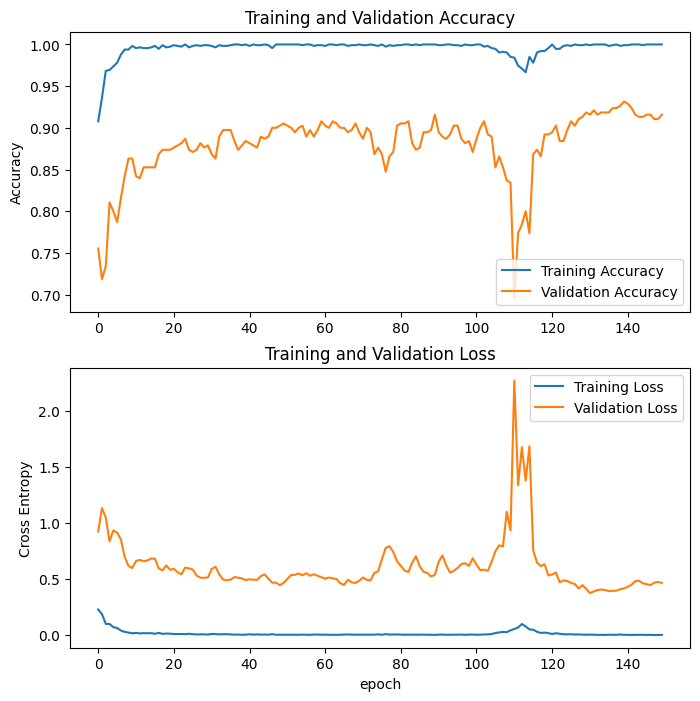

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
acc += history1.history['accuracy']
val_acc += history1.history['val_accuracy']

loss += history1.history['loss']
val_loss += history1.history['val_loss']

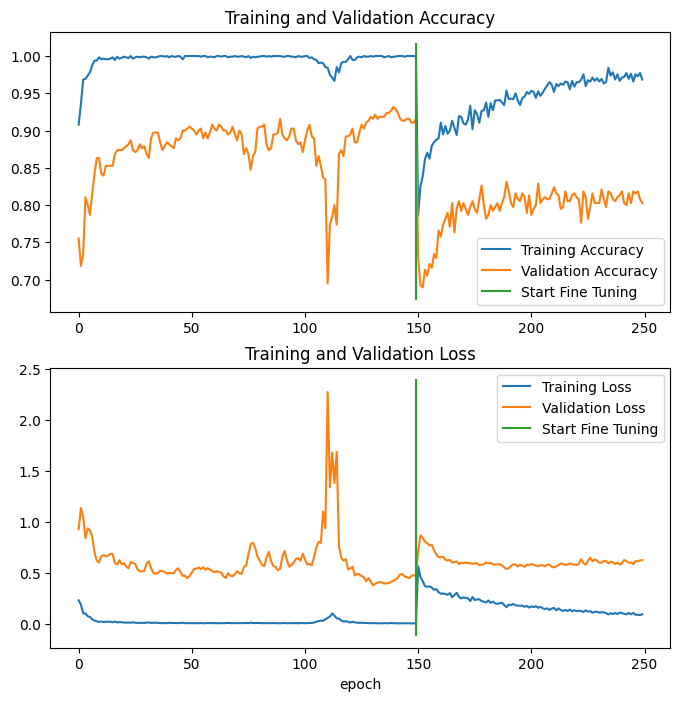

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

plt.plot([len(history.epoch)-1,len(history.epoch)-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

plt.plot([len(history.epoch)-1,len(history.epoch)-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
